# Worker selection

*January 6th, 2020*

So, I launched a HIT with 10 links per HIT in order to identify potentially reliable workers that could work on the entire dataset -- that was in early December 2019.

We have identified a couple workers that did a decent job, although a couple of points need to be specified. However, it was clear that none of them actually watched the instruction video that Kevin had prepared:

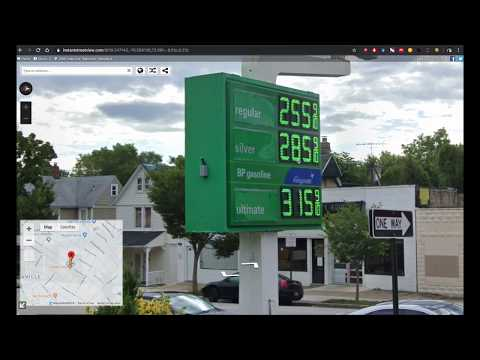

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('d-8n09odPXw')

We have identified a couple of workers who did an OK job, but require further training. As such, I was asked to contact the following workers:

A15DABFV6HEG1J

A1EG0LU5SC669K

A28QUR0QYD2WI7

A29J5UFG3E9FXR

A3GL87ULMLS0V2

A2P6JE905T3R93

We had the idea of paying them $1 each to watch the complete video, after which they will be invited to complete the HITs that we will release in batches.

## Creating a qualification type for selected workers

In order to ensure that only qualified workers can work on the HIT, I need to create a qualification type.

In [115]:
import boto3
endpoint_url = "https://mturk-requester.us-east-1.amazonaws.com"
client = boto3.client('mturk', endpoint_url=endpoint_url)

response = client.create_qualification_type(
    Name='our_qualified_workers',
    Keywords='qualified,workers',
    Description='Selected workers based on preliminary round',
    QualificationTypeStatus='Active',
    RetryDelayInSeconds=123,
    TestDurationInSeconds=0,
    AutoGranted=True,
    AutoGrantedValue=123
)
qualification_id = response["QualificationType"]["QualificationTypeId"]

In [116]:
print(response)

{'QualificationType': {'QualificationTypeId': '3UYIJTD339QF6V6L5BXPIU267D0I39', 'CreationTime': datetime.datetime(2020, 1, 6, 10, 4, 7, tzinfo=tzlocal()), 'Name': 'our_qualified_workers', 'Description': 'Selected workers based on preliminary round', 'Keywords': 'qualified,workers', 'QualificationTypeStatus': 'Active', 'RetryDelayInSeconds': 123, 'IsRequestable': True, 'AutoGranted': True, 'AutoGrantedValue': 123}, 'ResponseMetadata': {'RequestId': '068d4240-d8ad-4adf-8045-c81498d2e8e4', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '068d4240-d8ad-4adf-8045-c81498d2e8e4', 'content-type': 'application/x-amz-json-1.1', 'content-length': '353', 'date': 'Mon, 06 Jan 2020 15:04:06 GMT'}, 'RetryAttempts': 0}}


The qualification ID that I received is 3UYIJTD339QF6V6L5BXPIU267D0I39.

In [117]:
def associate(qualification_id, worker_id):
    response = client.associate_qualification_with_worker(
        QualificationTypeId=qualification_id,
        WorkerId=worker_id,
        IntegerValue=123,
        SendNotification=False
    )
    print(response)

In [118]:
WORKERS = [
    "A1EG0LU5SC669K",
    "A15DABFV6HEG1J",
    "A28QUR0QYD2WI7",
    "A29J5UFG3E9FXR",
    "A3GL87ULMLS0V2",
    "A2P6JE905T3R93"
]

for worker in WORKERS:
    associate(qualification_id, worker)

{'ResponseMetadata': {'RequestId': 'eddc4b23-7ffc-4675-b4b6-e054e83dfb5a', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'eddc4b23-7ffc-4675-b4b6-e054e83dfb5a', 'content-type': 'application/x-amz-json-1.1', 'content-length': '2', 'date': 'Mon, 06 Jan 2020 15:04:36 GMT'}, 'RetryAttempts': 0}}
{'ResponseMetadata': {'RequestId': 'cb8b043e-72ea-4331-be09-6f4a3cbf06ef', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'cb8b043e-72ea-4331-be09-6f4a3cbf06ef', 'content-type': 'application/x-amz-json-1.1', 'content-length': '2', 'date': 'Mon, 06 Jan 2020 15:04:36 GMT'}, 'RetryAttempts': 0}}
{'ResponseMetadata': {'RequestId': '0978c5c5-155f-4d40-a6cd-216c6b21304a', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '0978c5c5-155f-4d40-a6cd-216c6b21304a', 'content-type': 'application/x-amz-json-1.1', 'content-length': '2', 'date': 'Mon, 06 Jan 2020 15:04:37 GMT'}, 'RetryAttempts': 0}}
{'ResponseMetadata': {'RequestId': '9f9846a8-2023-4b8d-89f3-3c82dd9c6af6', 'HTTPSt

In [149]:
import boto3
endpoint_url = "https://mturk-requester-sandbox.us-east-1.amazonaws.com"
client = boto3.client('mturk', endpoint_url=endpoint_url)

response = client.create_qualification_type(
    Name='our_qualified_workers2',
    Keywords='qualified,workers',
    Description='Selected workers based on preliminary round',
    QualificationTypeStatus='Active',
    RetryDelayInSeconds=123,
    TestDurationInSeconds=0,
    AutoGranted=True,
    AutoGrantedValue=123
)
qualification_id = response["QualificationType"]["QualificationTypeId"]

In [150]:
print(response)

{'QualificationType': {'QualificationTypeId': '3I33S531S20XBJWO15EK1HT8N5G7H0', 'CreationTime': datetime.datetime(2020, 1, 6, 10, 19, 30, tzinfo=tzlocal()), 'Name': 'our_qualified_workers2', 'Description': 'Selected workers based on preliminary round', 'Keywords': 'qualified,workers', 'QualificationTypeStatus': 'Active', 'RetryDelayInSeconds': 123, 'IsRequestable': True, 'AutoGranted': True, 'AutoGrantedValue': 123}, 'ResponseMetadata': {'RequestId': 'df156a37-a7e1-455d-960e-c5fdbc11e262', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'df156a37-a7e1-455d-960e-c5fdbc11e262', 'content-type': 'application/x-amz-json-1.1', 'content-length': '353', 'date': 'Mon, 06 Jan 2020 15:19:30 GMT'}, 'RetryAttempts': 0}}


The qualification ID that I received is 3I33S531S20XBJWO15EK1HT8N5G7H0 for the sandbox.

In [151]:
def associate(client, qualification_id, worker_id):
    response = client.associate_qualification_with_worker(
        QualificationTypeId=qualification_id,
        WorkerId=worker_id,
        IntegerValue=123,
        SendNotification=False
    )
    print(response)

In [152]:
associate(client, qualification_id, "A693011I1E0SC") # that's me

{'ResponseMetadata': {'RequestId': '7b338548-59e6-4f42-87b0-8977cac14701', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '7b338548-59e6-4f42-87b0-8977cac14701', 'content-type': 'application/x-amz-json-1.1', 'content-length': '2', 'date': 'Mon, 06 Jan 2020 15:20:23 GMT'}, 'RetryAttempts': 0}}


## Creating the video tutorial template

I created a video tutorial template. It ensures that the workers spend at least 140s on the HIT. This way, they will not get anything if they try to submit without watching the video.

In [100]:
## TEST in sandbox
TEMPLATE = "./templates/instruction_video.html"

# Instantiate the client
import boto3
endpoint_url = "https://mturk-requester-sandbox.us-east-1.amazonaws.com"
client = boto3.client('mturk', endpoint_url=endpoint_url)

# Load the template
template = open(TEMPLATE).read()

# Submit the HIT
response = client.create_hit(
        MaxAssignments=1,
        AutoApprovalDelayInSeconds=2592000,
        LifetimeInSeconds=31536000,
        AssignmentDurationInSeconds=20000,
        Reward='1.00',
        Title='Finding gas prices in Street View Imagery (tutorial)',
        Keywords='vision,copy-paste,easy,computer vision',
        Description='Watch an instruction video for our task',
        Question=template,
        RequesterAnnotation='something'
    )

hit_id = response["HIT"]["HITId"]

In [97]:
response = client.list_assignments_for_hit(
    HITId=hit_id
)
print(response)

{'NextToken': 'p1:QCb+4ytKSyAIoa/nmMrOSquKZUCC5Y7UyAE8Wfv0dkb+GDWLRVUWRTz4NSPnHg==', 'NumResults': 1, 'Assignments': [{'AssignmentId': '3IO1LGZLK9WVE4TCEG26V0AU07P687', 'WorkerId': 'A693011I1E0SC', 'HITId': '3L21G7IH46VDZ4L4VCJHAXCZHZBY1M', 'AssignmentStatus': 'Submitted', 'AutoApprovalTime': datetime.datetime(2020, 2, 5, 9, 32, 46, tzinfo=tzlocal()), 'AcceptTime': datetime.datetime(2020, 1, 6, 9, 30, 22, tzinfo=tzlocal()), 'SubmitTime': datetime.datetime(2020, 1, 6, 9, 32, 46, tzinfo=tzlocal()), 'Answer': '<?xml version="1.0" encoding="ASCII"?><QuestionFormAnswers xmlns="http://mechanicalturk.amazonaws.com/AWSMechanicalTurkDataSchemas/2005-10-01/QuestionFormAnswers.xsd"><Answer><QuestionIdentifier>answer</QuestionIdentifier><FreeText>$$${"timeElapsed":142.848}$$$</FreeText></Answer></QuestionFormAnswers>'}], 'ResponseMetadata': {'RequestId': 'b91cec6e-10c6-4c3a-93de-d54a3bc6e8a5', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'b91cec6e-10c6-4c3a-93de-d54a3bc6e8a5', 'conte

## Actual HIT (link extraction)

I had noticed that for some of the HITs, it was possible to return an empty answer. It is possible that this issue was caused by one of the following:

* The submit button was submitting the HIT form without running the other JavaScript code; this was fixed by setting the button type to "button". This way, clicking on submit does not submit the form by default.
* The lifetime of the HIT was too short... upped it to the max value.
* Assignment duration was too short.

Let's try it again and troubleshoot as we go.

In [7]:
import re
import json

def parse_response(response):
    answers = response["Assignments"][0]["Answer"]
    assignment = {}
    assignment["answers"] = json.loads(re.search(r"\$\$\$(.*)\$\$\$", answers).group(1))
    assignment["assignment_id"] = response["Assignments"][0]["AssignmentId"]
    assignment["hit_id"] = response["Assignments"][0]["HITId"]
    assignment["worker_id"] = response["Assignments"][0]["WorkerId"]
    assignment["accept_time"] = response["Assignments"][0]["AcceptTime"].timestamp() # ms since epoch
    assignment["submit_time"] = response["Assignments"][0]["SubmitTime"].timestamp() # ms since epoch
    return assignment

In [154]:
def create_hit(client, template_file, links_file):
    # Load the template
    template = open(template_file).read()

    # Get the links
    links = open(links_file).readlines()
    indices = list(range(1, len(links) + 1))

    link_template = '<div><a href="{}" target="_blank">Link {}</a><input type="text" id="link{}" style="width: 600px;"></div>'
    links = [link_template.format(link, i+1, i+1) for i, link in enumerate(links)]
    answers = ['answer.link{} = $("#link{}").val();'.format(i,i) for i in indices]

    template = template.replace("===LINKS===", "\n".join(links))
    template = template.replace("===ANSWERS===", "\n".join(answers))
    template = template.replace("===NUMLINKS===", str(len(links)))

    response = client.create_hit(
        MaxAssignments=1,
        AutoApprovalDelayInSeconds=2592000,
        LifetimeInSeconds=31536000,
        AssignmentDurationInSeconds=2000,
        Reward='0.10',
        Title='Finding gas prices in Street View Imagery',
        Keywords='vision,copy-paste,easy,computer vision',
        Description='Help us find gas prices in Street View Imagery.',
        Question=template,
        RequesterAnnotation='something',
        QualificationRequirements=[
        {
            'QualificationTypeId': '3I33S531S20XBJWO15EK1HT8N5G7H0',
            'Comparator': 'EqualTo',
            'IntegerValues': [
                123,
            ],
            
        }
    ]
    )
    
    return response

In [155]:
## TEST in sandbox
TEMPLATE = "./templates/template.html"
LINKS = "./inputs/prequalification/batch1.txt"

# Instantiate the client
import boto3
endpoint_url = "https://mturk-requester-sandbox.us-east-1.amazonaws.com"
client = boto3.client('mturk', endpoint_url=endpoint_url)

resp = create_hit(client, TEMPLATE, LINKS)
hit_id = resp["HIT"]["HITId"]

In [162]:
response = client.list_assignments_for_hit(
    HITId=hit_id
)
print(parse_response(response))

{'answers': {'videoWasWatched': False, 'answer': {'link1': 'https://www.instantstreetview.com/@30.726723,-88.0941,0h,0p,0z', 'link2': 'https://www.instantstreetview.com/@30.726723,-88.0941,0h,0p,1z', 'link3': 'https://www.instantstreetview.com/@30.726723,-88.0941,0h,0p,2z', 'link4': 'https://www.instantstreetview.com/@30.726723,-88.0941,0h,0p,3z', 'link5': 'https://www.instantstreetview.com/@30.726723,-88.0941,0h,0p,4z', 'link6': 'https://www.instantstreetview.com/@30.726723,-88.0941,0h,0p,5z', 'link7': 'https://www.instantstreetview.com/@30.726723,-88.0941,0h,0p,6z', 'link8': 'https://www.instantstreetview.com/@30.726723,-88.0941,0h,0p,7z', 'link9': 'https://www.instantstreetview.com/@30.726723,-88.0941,0h,0p,8z', 'link10': 'https://www.instantstreetview.com/@30.726723,-88.0941,0h,0p,9z'}}, 'assignment_id': '3K4J6M3CXESBULBXNRV63ITEK9SAGH', 'hit_id': '39WSF6KUV1K0PRBE1D5YFQXRSYHOEL', 'worker_id': 'A693011I1E0SC', 'accept_time': 1578324139.0, 'submit_time': 1578324173.0}


## Contact the workers

I will need to contact the workers in order to invite them to complete the instructional HIT.

In [163]:
WORKERS = [
    "A1EG0LU5SC669K",
    "A15DABFV6HEG1J",
    "A28QUR0QYD2WI7",
    "A29J5UFG3E9FXR",
    "A3GL87ULMLS0V2",
    "A2P6JE905T3R93"
]

In [166]:
EMAIL = """Hello,
    
A couple of weeks ago, you completed a HIT where you were asked to use Google Street View to zoom on gas prices 
for a series of gas stations and to provid the link. We reviewed your work and would like to invite you to
complete more of these tasks.

You will be paid 0.10 per HIT (for 10 links). We have thousands of links to fetch, so there is a significant 
earning opportunity with this task. Before completing the HITs, we would like to ask that you complete a HIT
where you watch a tutorial video (for 1USD). After this, you will be allowed to complete more HITs at the rate
mentionned previously.

Please let us know if you are interested, and the qualification will be given to you.

Cheers,
Francois
"""

In [167]:
import boto3
endpoint_url = "https://mturk-requester.us-east-1.amazonaws.com"
client = boto3.client('mturk', endpoint_url=endpoint_url)

response = client.notify_workers(
    Subject='Invitation to complete a series of HITs',
    MessageText=EMAIL,
    WorkerIds=WORKERS
)

# Worker responses

Only two workers responded to the email. Let us try again, but this time, only allowing workers with an approval > 95% to complete the HIT.

In [12]:
import boto3
dev_endpoint_url = "https://mturk-requester-sandbox.us-east-1.amazonaws.com"
dev_client = boto3.client('mturk', endpoint_url=dev_endpoint_url)

prod_endpoint_url = "https://mturk-requester-sandbox.us-east-1.amazonaws.com"
prod_client = boto3.client('mturk', endpoint_url=prod_endpoint_url)

In [13]:
def create_hit(client, template_file, links_file):
    # Load the template
    template = open(template_file).read()

    # Get the links
    links = open(links_file).readlines()
    indices = list(range(1, len(links) + 1))

    link_template = '<div><a href="{}" target="_blank">Link {}</a><input type="text" id="link{}" style="width: 600px;"></div>'
    links = [link_template.format(link, i+1, i+1) for i, link in enumerate(links)]
    answers = ['answer.link{} = $("#link{}").val();'.format(i,i) for i in indices]

    template = template.replace("===LINKS===", "\n".join(links))
    template = template.replace("===ANSWERS===", "\n".join(answers))
    template = template.replace("===NUMLINKS===", str(len(links)))

    response = client.create_hit(
        MaxAssignments=20,
        AutoApprovalDelayInSeconds=2592000,
        LifetimeInSeconds=31536000,
        AssignmentDurationInSeconds=2000,
        Reward='0.10',
        Title='Finding gas prices in Street View Imagery (qualification)',
        Keywords='vision,copy-paste,easy,computer vision',
        Description='Help us find gas prices in Street View Imagery. There will be many HITs for workers who qualify.',
        Question=template,
        RequesterAnnotation='something',
        QualificationRequirements=[
        # at least 95% of assignments were approved
        {
            'QualificationTypeId': '000000000000000000L0',
            'Comparator': 'GreaterThanOrEqualTo',
            'IntegerValues': [
                95,
            ],
            
        },
        # submitted at least 200 assignments
        {
            'QualificationTypeId': '00000000000000000040',
            'Comparator': 'GreaterThanOrEqualTo',
            'IntegerValues': [
                200,
            ],
        }
        ]
    )
    
    return response

In [15]:
template_file = "./templates/template.html"
links_file = "./inputs/prequalification/batch1.txt"

resp = create_hit(prod_client,template_file, links_file)
print(resp)

{'HIT': {'HITId': '372AGES0I34CS4UBOACUXAN3JYKXRY', 'HITTypeId': '3EH3OJYIRZXSJJ6MKNIR6EYT8H7AYF', 'HITGroupId': '3K3X4GGOSLMYXQ4ZABU08GUX9LDMCI', 'CreationTime': datetime.datetime(2020, 1, 20, 8, 20, 1, tzinfo=tzlocal()), 'Title': 'Finding gas prices in Street View Imagery (qualification)', 'Description': 'Help us find gas prices in Street View Imagery. There will be many HITs for workers who qualify.', 'Question': '<HTMLQuestion xmlns="http://mechanicalturk.amazonaws.com/AWSMechanicalTurkDataSchemas/2011-11-11/HTMLQuestion.xsd">\n  <HTMLContent><![CDATA[\n<!DOCTYPE html>\n<html>\n <head>\n  <meta http-equiv=\'Content-Type\' content=\'text/html; charset=UTF-8\'/>\n  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">\n  <script type=\'text/javascript\' src=\'https://s3.amazonaws.com/mturk-public/externalHIT_v1.js\'></script>\n\

In [21]:
response = prod_client.list_assignments_for_hit(
    HITId="372AGES0I34CS4UBOACUXAN3JYKXRY"
)
print(parse_response(response))

IndexError: list index out of range

Ok, the HIT works. Now I want to create a HIT with ~30 assignments to find good workers. Let's create a qualification that requires >90% approval to complete the HIT.

In [22]:
prod_client.list_assignments_for_hit(HITId="372AGES0I34CS4UBOACUXAN3JYKXRY")

{'NumResults': 0,
 'Assignments': [],
 'ResponseMetadata': {'RequestId': 'e85461ca-59ee-4067-9cbb-ed4219978a14',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'e85461ca-59ee-4067-9cbb-ed4219978a14',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '33',
   'date': 'Mon, 20 Jan 2020 13:55:23 GMT'},
  'RetryAttempts': 0}}